In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
data <- read.csv("../data/scenarios.csv", sep=";")
data

Genome,d,Scenarios,Intermediates
<chr>,<int>,<chr>,<chr>
Chimpanzee,27,6.54 * 10^{11},2.46 * 10^{4}
Orangutan,53,6.03 * 10^{38},1.29 * 10^{10}
Rhesus,150,1.21 * 10^{138},1.45 * 10^{28}
Marmoset,204,3.99 * 10^{250},3.13 * 10^{43}
Horse,225,1.63 * 10^{135},1.31 * 10^{51}
Dog,304,"[10^{432},10^{471}]",6.37 * 10^{70}
Pig,318,"[10^{463},10^{479}]",1.61 * 10^{73}
White rhino,328,"[10^{546},10^{588}]",1.36 * 10^{84}
Elephant,336,"[10^{583},10^{609}]",8.56 * 10^{86}


In [2]:
num_to_log10scale <- function (x) {
    parts <- strsplit(x, split=" ")[[1]]
    x <- as.numeric(parts[1])
    # assumes that the 2nd factor is 10 to some power
    y <- as.numeric(substr(parts[3], 5, nchar(parts[3]) - 1))
    log10(x) + y
}

interval_to_log10scale <- function(x) {
    # assumes that x is 10 to some power; the function just extracts the exponent
    # exponent must be between { }
    extremes <- strsplit(substr(x, 2, nchar(x) - 1), split=",")[[1]]
    start <- as.numeric(gsub("^.*\\{(\\d+)\\}$", "\\1", extremes[1]))
    end <- as.numeric(gsub("^.*\\{(\\d+)\\}$", "\\1", extremes[2]))
    paste("[", start, ",", end, "]", sep="")
}

In [3]:
data["Intermediates"] <- apply(data["Intermediates"], 1, num_to_log10scale)
data[1:5,]["Scenarios"] <- apply(data[1:5,]["Scenarios"], 1, num_to_log10scale)
data[6:nrow(data),]["Scenarios"] <- apply(data[6:nrow(data),]["Scenarios"], 1, interval_to_log10scale)

Genome,d,Scenarios,Intermediates
<chr>,<int>,<chr>,<dbl>
Chimpanzee,27,11.8155777483243,4.390935
Orangutan,53,38.7803173121401,10.110590
Rhesus,150,138.082785370316,28.161368
Marmoset,204,250.600972895687,43.495544
Horse,225,135.212187604404,51.117271
Dog,304,"[432,471]",70.804139
Pig,318,"[463,479]",73.206826
White rhino,328,"[546,588]",84.133539
Elephant,336,"[583,609]",86.932474


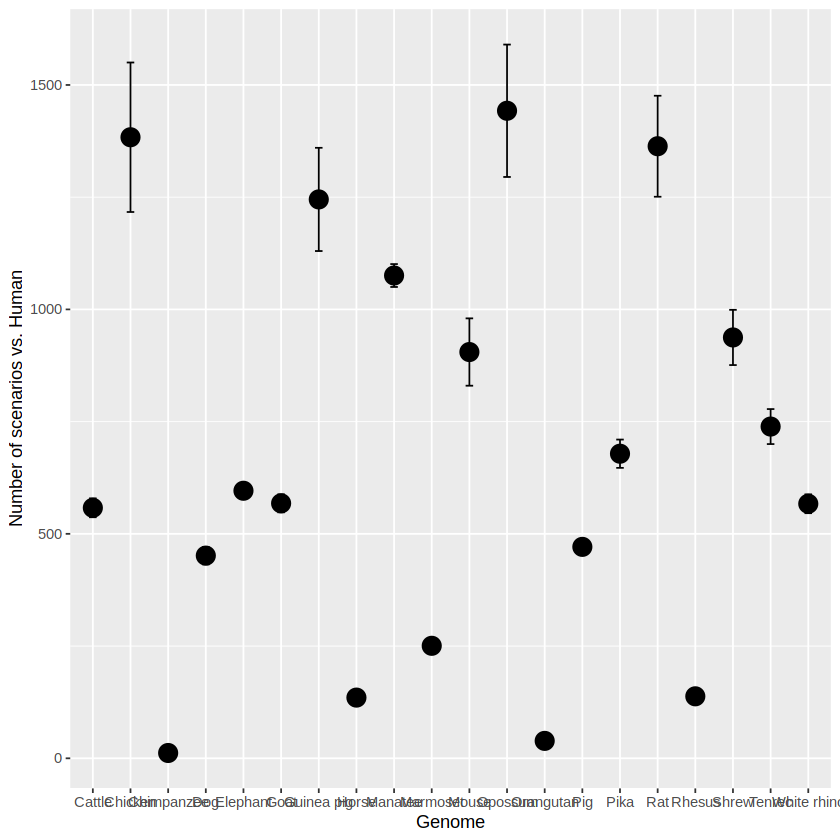

In [10]:
options(scipen = 999)

# Convert the range values in column "y" to separate minimum and maximum columns
data$scen_min <- as.numeric(gsub("\\[(\\d+),.+", "\\1", data$Scenarios))
data$scen_max <- as.numeric(gsub("\\[.+,(\\d+)]", "\\1", data$Scenarios))

# Create a bar plot with error bars
ggplot(data, aes(x = Genome, y = (scen_min + scen_max) / 2)) +
  geom_point(stat = "identity", size = 5) +
  geom_errorbar(aes(ymin = scen_min, ymax = scen_max), width = 0.2) +
  labs(x = "Genome",
       y = "Number of scenarios vs. Human")

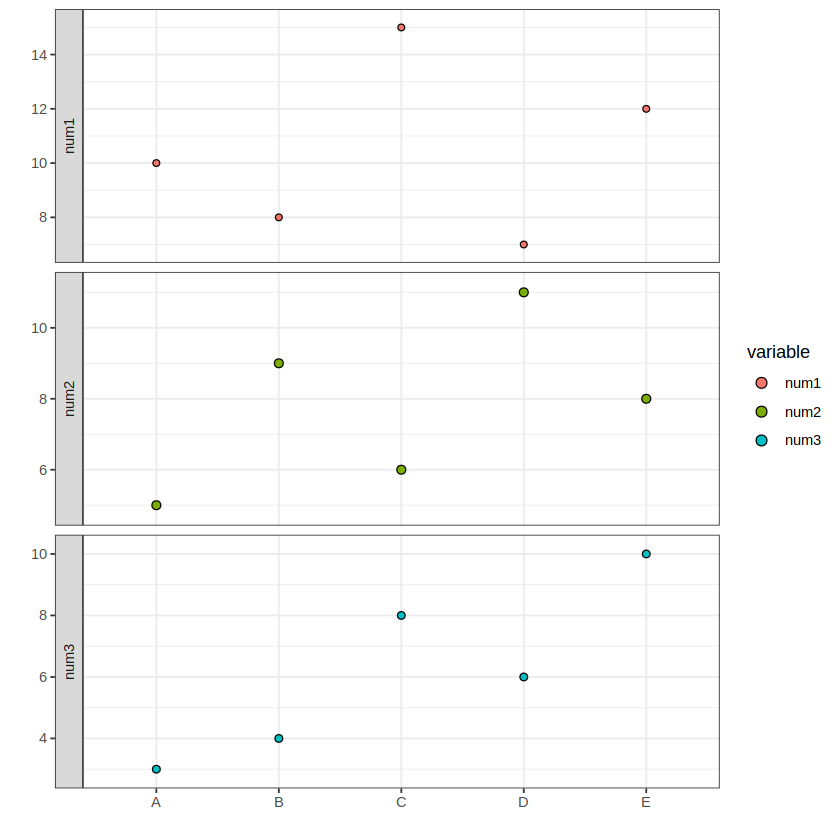

In [4]:
# Create the dataframe
df <- data.frame(strings = c("A", "B", "C", "D", "E"),
                 num1 = c(10, 8, 15, 7, 12),
                 num2 = c(5, 9, 6, 11, 8),
                 num3 = c(3, 4, 8, 6, 10))

# Melt the data to long format
df_long <- df %>% 
  pivot_longer(cols = c("num1", "num2", "num3"), names_to = "variable", values_to = "value")

# Plot the data
ggplot(df_long, aes(x = strings, y = value)) +
  geom_dotplot(aes(fill = variable), binaxis = "y", stackdir = "center", dotsize = 0.5, binwidth = 0.5) +
  facet_grid(variable ~ ., scales = "free", switch = "y") +
  scale_fill_manual(values = c("#F8766D", "#7CAE00", "#00BFC4")) +
  labs(x = "", y = "") +
  theme_bw()

In [16]:
df_long <- data %>%
  pivot_longer(cols = c("d", "scen_min", "scen_max", "Intermediates"), names_to = "variable", values_to = "value")

In [17]:
ggplot(df_long, aes(x = Genome, y = (scen_min + scen_max) / 2)) +
  #geom_dotplot(aes(fill = variable), binaxis = "y", stackdir = "center", dotsize = 0.5, binwidth = 0.5) +
  geom_point(stat = "identity", size = 5) +
  geom_errorbar(aes(ymin = scen_min, ymax = scen_max), width = 0.2) +
  facet_grid(variable ~ ., scales = "free", switch = "y") +
  scale_fill_manual(values = c("#F8766D", "#7CAE00", "#00BFC4"))

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'scen_min' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 